In [2]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd

## Phase 1: Build everything from scratch without classes (understand the core logic)

In [ ]:
#Phase 1.1: Vandermonde from Scratch

x_points = np.array([-1.0, 0.0, 2.0])
y_points = np.array([1.0, 0.0, 4.0])

num_points = len(x_points) # num_points = n (deg.) + 1

#__________________________________________________________________________

X = np.zeros((num_points , num_points)) # Vandermonde Matrix X

for i in range(num_points):
  for j in range(num_points):
    X[i, j] = x_points[i] ** j

#__________________________________________________________________________

X_inv = np.linalg.inv(X)

a_coeff = np.dot(X_inv, y_points)

# evaluate polynomial at x = 3
x = 3 # try with an array next time (remember y = array if x = array)
y = 0

for i in range(num_points):
  y += a_coeff[i] * x**i # a_0 * x^0 + ... + a_n * x^n
#__________________________________________________________________________

print(y)

9.0


In [ ]:
# Phase 1.2: Lagrange from Scratch

x_points = np.array([-1.0, 0.0, 2.0])
y_points = np.array([1.0, 0.0, 4.0])

num_points = len(x_points)

#__________________________________________________________________________

# evaluate polynomial at x = 3
x = 3 # try with an array next time
y = 0


for k in range(num_points):
  l_k = 1.0
  for j in range(num_points):
    if j != k:
      l_k *= (x - x_points[j]) / (x_points[k] - x_points[j])

  y += y_points[k] * l_k

print(y)

9.0


In [ ]:
# Phase 1.3: Newton's Divided Difference from Scratch

x_points = np.array([-1.0, 0.0, 2.0])
y_points = np.array([1.0, 0.0, 4.0])

num_points = len(x_points)

#__________________________________________________________________________

b_table = np.zeros((num_points, num_points)) # build divided difference table

b_table[:, 0] = y_points

for j in range(1, num_points): # outer loop for columns
  for i in range(num_points - j): # inner loop for rows
    b_table[i, j] = (b_table[i + 1, j - 1] - b_table[i, j - 1]) / (x_points[i + j] - x_points[i])

#print(b_table)

a_coeff = b_table[0, :]

#__________________________________________________________________________

# evaluate polynomial at x = 3
x = 3 # try with an array next time
y = 0


for k in range(num_points):
  newton = 1
  for j in range(k):
    newton *= (x - x_points[j])

  y += a_coeff[k] * newton

print(y)

9.0


In [ ]:
# Phase 1.4: Hermite from Scratch

x_points = np.array([0.0, 1.0])
y_points = np.array([1.0, 2.0])
y_prime_points = np.array([3.0, 4.0])

num_points = len(x_points) # n + 1

#__________________________________________________________________________

def l(k, x_data):
  l_poly = 1.0

  for j in range(num_points):
    if j != k:
      l_poly *= Polynomial([-x_data[j], 1]) / (x_data[k] - x_data[j])

  return l_poly


def h(k, x_data):
  l_k = l(k, x_data)

  l_k_prime = l_k.deriv(1); l_k_prime_x_k = l_k_prime(x_data[k])

  l_k_sqr = l_k ** 2

  c0 = 1 + 2 * x_data[k] * l_k_prime_x_k
  c1 = -2 * l_k_prime_x_k

  return Polynomial([c0, c1]) * l_k_sqr

def h_hat(k, x_data):
  return Polynomial([-x_data[k], 1]) * (l(k, x_data) ** 2)

#__________________________________________________________________________

x = 0.5
y = 0

for k in range(num_points):
  y += y_points[k] * h(k, x_points)(x) + y_prime_points[k] * h_hat(k, x_points)(x)

print(y)

1.375


In [ ]:
# Phase 1.5: Differentiation & Richardson from Scratch

f = lambda x: x**3

x = 2.0
h = 0.1

true_deriv = 3 * x ** 2; print(true_deriv)

fwd_approx = (f(x + h) - f(x)) / h
fwd_error = abs(true_deriv - fwd_approx) ; print(f'forward approx = {fwd_approx} and error = {fwd_error}')

bwd_approx = (f(x) - f(x - h)) / h
bwd_error = abs(true_deriv - bwd_approx) ; print(f'Backward approx = {bwd_approx} and error = {bwd_error}')

central_approx = (f(x + h) - f(x - h)) / (2*h)
central_error = abs(true_deriv - central_approx) ; print(f'Central approx = {central_approx} and error = {central_error}')

print('_________________________________________________________________________________________________\n')

D_h = central_approx

h_half = h / 2

D_h_half = (f(x + h_half) - f(x - h_half)) / (2*h_half)

D_over_1 = (4 * D_h_half - D_h) / 3
richardson_error = abs(true_deriv - D_over_1); print(f'Richardson approx = {D_over_1} and error = {richardson_error}')

12.0
forward approx = 12.61000000000001 and error = 0.6100000000000101
Backward approx = 11.410000000000009 and error = 0.589999999999991
Central approx = 12.010000000000009 and error = 0.010000000000008669
_________________________________________________________________________________________________

Richardson approx = 11.999999999999966 and error = 3.375077994860476e-14


## Phase 2: Exam type scenario practice with functions modifications

In [ ]:
# Phase 2.1: The Polynomial Class. No need to practice this. Go to 2.2.



class Polynomial:
  def __init__(self, coeff):

    self.coeff = np.array(coeff, dtype = np.float64)
    self. degree = len(self.coeff) -1

  def __repr__(self):

    output = f"The Polynomial of degree {self.degree}\nP(x) = "
    for i in range(self.degree + 1):
      a_i = self.coeff[i]

      if i == 0:
        output += f"{a_i}x^0 "

      else:
        if a_i >= 0:
          output += f"+ {a_i}x^{i} "

        else:
          output += f"- {-a_i}x^{i} "

    return output


  def __call__(self, x_arr):

    x_arr = np.array(x_arr)
    if x_arr.shape == (): # only a value was given
      x_arr = np.array([x_arr])

    output = np.zeros(x_arr.shape)

    for i in range(len(x_arr)):
      for j in range(self.degree + 1):

        output[i] += self.coeff[j] * (x_arr[i] ** j)

    return output

  def get_degree(self):
    return self.degree

  def get_coeff(self):
    return self.coeff

In [5]:
# Phase 2.2: if these are the solutions to two modified Vandermonde questions, can you guess the questions?

# For question 1____________________________________________________________
def vandermonde(x_points, y_points):
  x_points, y_points = np.array(x_points), np.array(y_points)
  num_points = len(x_points)
  van_mat = np.zeros((num_points, num_points))

  for i in range(num_points):
    for j in range(num_points):
      van_mat[i, j] = x_points[i] ** (num_points - 1 - j)

  return van_mat

print(vandermonde([1, 2, 3], [1, 4, 9]))

# For question 2____________________________________________________________
def vandermonde_matrix(data_points):
    x_points = []
    for i,j in data_points:
        x_points.append(i)

    num_points = len(x_points)

    van_mat = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            van_mat[num_points - 1 - i, num_points - 1 - j] = x_points[i] ** j
    return van_mat

data_points = [(53,-90), (-30,-140), (-100,-3), (0,1), (37,10), (79,42)]
x_new = vandermonde_matrix(data_points)

print("X_new:", x_new)

diag_coeff = []
for i in range(len(data_points)-1, -1, -1):
    diag_coeff.append(x_new[i, i])

poly = Polynomial(diag_coeff)
print('\n\n\n')
print("Polynomial:", poly)

[[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]
X_new: [[ 3.07705640e+09  3.89500810e+07  4.93039000e+05  6.24100000e+03
   7.90000000e+01  1.00000000e+00]
 [ 6.93439570e+07  1.87416100e+06  5.06530000e+04  1.36900000e+03
   3.70000000e+01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.00000000e+10  1.00000000e+08 -1.00000000e+06  1.00000000e+04
  -1.00000000e+02  1.00000000e+00]
 [-2.43000000e+07  8.10000000e+05 -2.70000000e+04  9.00000000e+02
  -3.00000000e+01  1.00000000e+00]
 [ 4.18195493e+08  7.89048100e+06  1.48877000e+05  2.80900000e+03
   5.30000000e+01  1.00000000e+00]]




Polynomial: 1.0 - 30.0·x + 10000.0·x² + 0.0·x³ + 1874161.0·x⁴ + (3.0770564e+09)·x⁵


In [ ]:
# Phase 2.3: if this is the solution of a modified Lagrange question, can you guess the question?

from numpy.polynomial import Polynomial
def l_k(x_points, k, x = None):

  num_points = len(x_points)
  l = 1
  for j in range(0, num_points, 2):
    if j != k:

      if x is not None:
        l *= (x - x_points[j]) / (x_points[k] - x_points[j])

      else:
        l *= Polynomial([-x_points[j], 1]) / (x_points[k] - x_points[j])

  return l

def lagrange(x_points, y_points, x = None):
  x_points, y_points = np.array(x_points), np.array(y_points)
  num_points = len(x_points)

  p = 0
  for k in range(num_points - 1, -1, -1):
    p += y_points[k] * l_k(x_points, num_points - 1 - k, x)

  return p

x_values = np.linspace(2, 7, 40, dtype = int)
x_points = [1, 4, 6, 8]; y_points = [3, 5, 8, 14]
p = lagrange(x_points, y_points, x_values)
print(p, '\n')


x_points = [1, 4, 6, 8]; y_points = [3, 5, 8, 14]
p = lagrange(x_points, y_points)
print(p, '\n')

answer = p(x_values)

print(answer)

[16.67619048 16.67619048 16.67619048 16.67619048 16.67619048 16.67619048
 16.67619048 16.67619048 17.11428571 17.11428571 17.11428571 17.11428571
 17.11428571 17.11428571 17.11428571 17.11428571 15.31428571 15.31428571
 15.31428571 15.31428571 15.31428571 15.31428571 15.31428571 15.31428571
 11.27619048 11.27619048 11.27619048 11.27619048 11.27619048 11.27619048
 11.27619048 11.27619048  5.          5.          5.          5.
  5.          5.          5.         -3.51428571] 

9.08571429 + 6.03333333·x - 1.11904762·x² 

[16.67619048 16.67619048 16.67619048 16.67619048 16.67619048 16.67619048
 16.67619048 16.67619048 17.11428571 17.11428571 17.11428571 17.11428571
 17.11428571 17.11428571 17.11428571 17.11428571 15.31428571 15.31428571
 15.31428571 15.31428571 15.31428571 15.31428571 15.31428571 15.31428571
 11.27619048 11.27619048 11.27619048 11.27619048 11.27619048 11.27619048
 11.27619048 11.27619048  5.          5.          5.          5.
  5.          5.          5.         -3.5142

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial
def calc_div_diff(x_points, y_points):
  num_points = len(x_points)
  b_table = np.zeros((num_points, num_points))
  b_table[:, 0] = y_points

  for j in range(1, num_points):
    for i in range(num_points - j):
      b_table[i, j] = (b_table[i + 1, j - 1] - b_table[i, j - 1]) / (x_points[i + j] - x_points[i])

  a_coeff = b_table[0, :]
  return a_coeff



def n(x_points, k, x):

  n_k = 1

  for j in range(k):
    if x is not None:
      n_k *= (x - x_points[j])

    else:
      n_k *= Polynomial([-x_points[j], 1])

  return n_k


def newton_div_diff(x_points, y_points, x = None):
  x_points, y_points = np.array(x_points), np.array(y_points)

  a_coeff = calc_div_diff(x_points, y_points)
  num_points = len(a_coeff)

  p = 0

  for k in range(num_points):
    p += n(x_points, k, x) * a_coeff[k]

  return p

x_points = [1,2,3]; y_points = [1,4,9]
p = newton_div_diff(x_points, y_points)
print(p)

0.0 + 0.0·x + 1.0·x²


In [ ]:
def l(k, x_points):
  num_points = len(x_points)
  l_k = 1
  for j in range(num_points):
    if j != k:
      l_k *= Polynomial([-x_points[j], 1]) / (x_points[k] - x_points[j])

  return l_k


def h(k, x_points):

  l_k = l(k, x_points)
  l_k_sqr = l_k ** 2
  l_k_prime = l_k.deriv(1)

  m = l_k_prime(x_points[k])

  c0 = 1 + 2 * m * x_points[k]
  c1 = -2 * m
  coeff = [c0, c1]

  return Polynomial(coeff) * l_k_sqr


def h_hat(k, x_points):
  l_k = l(k, x_points)
  l_k_sqr = l_k ** 2

  return Polynomial([-x_points[k], 1]) * l_k_sqr


def hermite(x_points, y_points, y_prime_points, x = None):
  x_points, y_points = np.array(x_points), np.array(y_points)
  num_points = len(x_points)

  p = 0

  for k in range(num_points):
    p += y_points[k] * h(k, x_points) + y_prime_points[k] * h_hat(k, x_points)

  if x is None:
    return p

  else:
    return p(x)

x_points = np.array([0.0, 1.0])
y_points = np.array([1.0, 2.0])
y_prime_points = np.array([3.0, 4.0])
p = hermite(x_points, y_points, y_prime_points)
print(p)

p = hermite(x_points, y_points, y_prime_points, 7)
print(p)

1.0 + 3.0·x - 7.0·x² + 5.0·x³
1394.0


   h_list     D_h_error  Richardson error
0   3.500  0.000000e+00      0.000000e+00
1   0.550 -5.329071e-15     -8.881784e-15
2   0.300 -5.329071e-15     -1.598721e-14
3   0.170 -7.105427e-15     -3.552714e-14
4   0.100  3.019807e-14     -2.842171e-14
5   0.055  2.486900e-14     -1.048051e-13
6   0.030 -6.039613e-14      9.414691e-14
7   0.017 -2.842171e-14      2.504663e-13
8   0.010 -1.207923e-13     -3.570477e-13


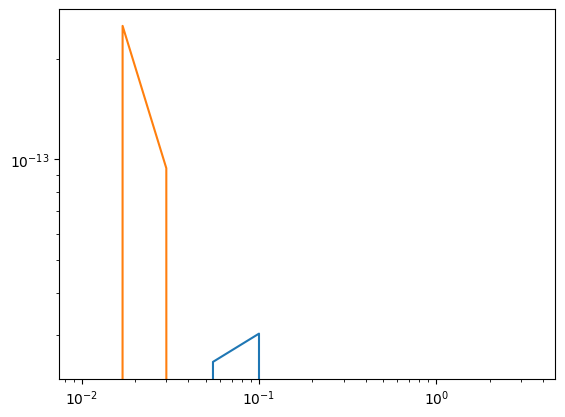

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def D_h(f, x, h):
  return ( f(x + h) - f(x - h) ) / (2 * h)


def richadson_approx(f, x, h):

  D_h_half = D_h(f, x, h/2)

  D_h_over_1 = ( 4 * D_h_half - D_h(f, x, h) ) / 3
  return D_h_over_1

def error(f, h_list, x):
  f_deriv = f.deriv(1)
  Y_actual = f_deriv(x)

  dh_error = np.array([])
  dh_over_1_error = np.array([])

  for h in h_list:
    dh_error = np.append(dh_error, D_h(f, x, h) - Y_actual)
    dh_over_1_error = np.append(dh_over_1_error, richadson_approx(f, x, h) - Y_actual)

  print(pd.DataFrame({'h_list': h_list, 'D_h_error':dh_error, 'Richardson error': dh_over_1_error}))


  plt.plot(h_list, dh_error)
  plt.plot(h_list, dh_over_1_error)
  plt.xscale('log')
  plt.yscale('log')
  plt.show()

  return dh_error, dh_over_1_error

f = Polynomial([1, 2, 3])
hs = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
e1, e2 = error(f, hs, 2.0)